<a href="https://colab.research.google.com/github/putyfruity/imperial_eee_machine_learning_course/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

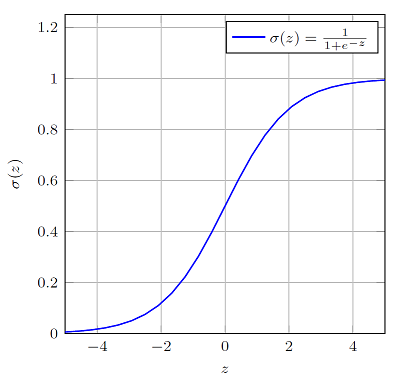

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

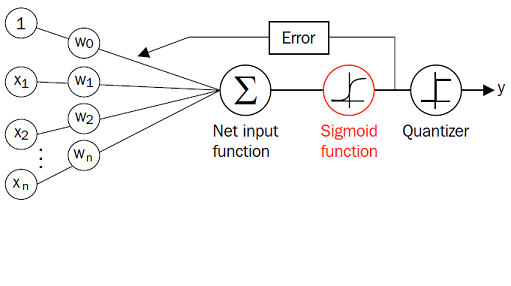

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$.


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N} \sum_{i=1}^{N} [-y_{i}\cdot\log\left(\hat{y}_{i}\right)-\left(1-y_{i}\right)\cdot\log\left(1-\hat{y}_{i}\right)]
\end{equation}
where $y_{i}$ is the label  for training example $i$, $\hat{y}_{i}$ is the predicted class by applying the hypothesis or $\sigma(z)$.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

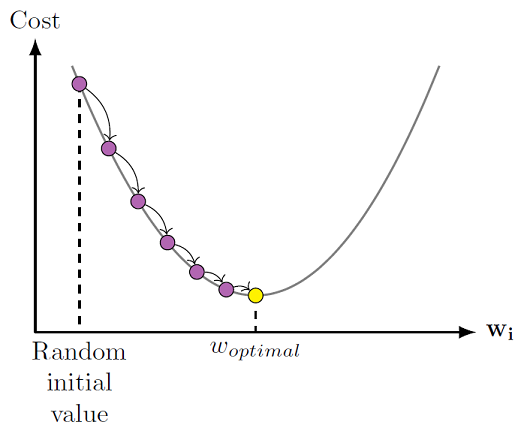


When the training is done and we want to predict the output using test data, the predicted probability can be converted into a binary outcome via a quantizer (unit step function) such that:

\begin{equation}
y_{pred} = \begin{cases}
      1 & \hat{y}\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [81]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [4]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

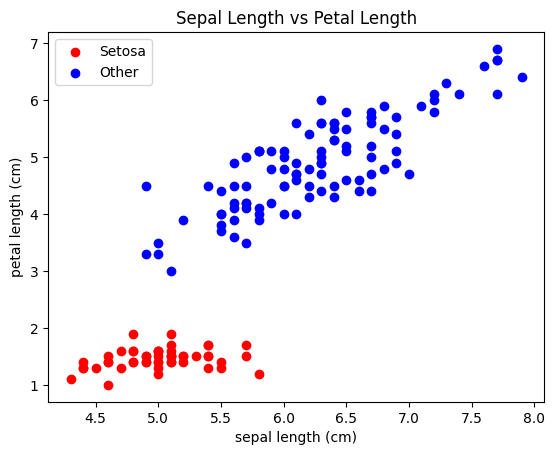

In [6]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [7]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [8]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [9]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [10]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [11]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.2382094249373507 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.1674853678274873 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.14576052746256243 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.1052199140543055 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights: [-0.31351439 -0.7

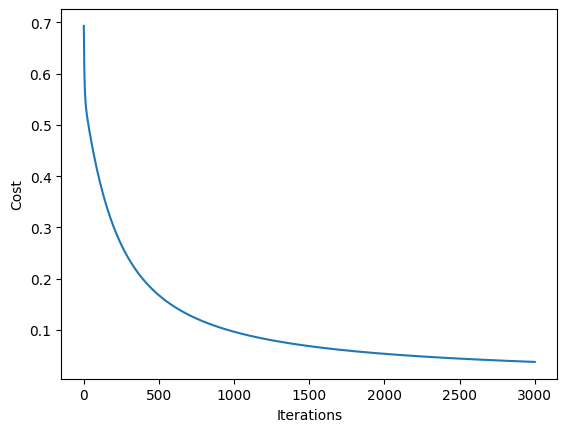

In [12]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [13]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


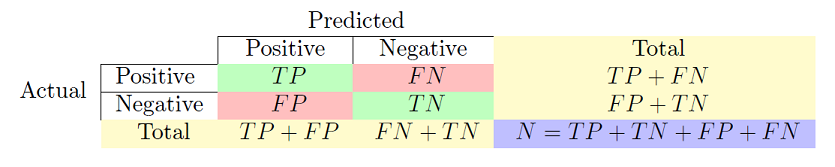

In [14]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


In [165]:
import random

data_size = len(iris_data.target)
test_ratio = 0.2 # need to use lower ratio, cos there maybe not enough sample if use larger ratio
test_limit = np.floor(data_size * test_ratio)

# start_index = 0
# end_index = total_data

# random_start_index = random.randint(start_index, end_index)
# test_set_end_index = int(random_start_index + testing_number)

# print(random_start_index)

# if test_set_end_index > end_index:
#   index_difference = test_set_end_index - end_index

#   testing_set_part1 = X[random_start_index:end_index]
#   testing_set_part2 = X[start_index:index_difference]

#   testing_set = np.concatenate((testing_set_part1, testing_set_part2))
#   training_set = X[index_difference:random_start_index]
# else:
#   testing_set = X[random_start_index:test_set_end_index]
#   testing_set = X[random_start_index:test_set_end_index]

#   training_set_part1 = X[start_index:random_start_index]
#   training_set_part2 = X[test_set_end_index:end_index]
#   training_set = np.concatenate((training_set_part1, training_set_part2))

# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]

# print(X)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

unique_label = len(np.unique(y))
print(unique_label)

counter = 0
type_min = 5
type_counter = 5

X_test = []
y_test = []
X_training = []
y_training = []

# split data but must include at least 5 from each type
for row in range(data_size):
  if random.randint(0,3) == 1 and counter != test_limit:
    X_test.append(X[row])
    y_test.append(y[row])
    counter += 1
  else:
    X_training.append(X[row])
    y_training.append(y[row])

  # print(counter != test_limit)

print(len(X_test), len(X_training))

X_training = np.array(X_training)
y_training = np.array(y_training)
X_test = np.array(X_test)
y_test = np.array(y_test)

# print(X)
# print(X_target)

2
30 120


iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.002      0.01436667 0.014975  ] 	
iteration: 101 	 cost: 0.3833091230517187 	 weights: [-0.04416232 -0.0499099   0.41522622] 	
iteration: 201 	 cost: 0.2939401415089408 	 weights: [-0.09744158 -0.19864963  0.667697  ] 	
iteration: 301 	 cost: 0.23553195697502569 	 weights: [-0.14003288 -0.31549187  0.87402224] 	
iteration: 401 	 cost: 0.19553820093997043 	 weights: [-0.17502567 -0.41019979  1.04603846] 	
iteration: 501 	 cost: 0.1668600321119244 	 weights: [-0.20451632 -0.48918175  1.19248309] 	
iteration: 601 	 cost: 0.14545719040132934 	 weights: [-0.22990661 -0.55661787  1.31949906] 	
iteration: 701 	 cost: 0.1289434665583962 	 weights: [-0.25215213 -0.61530453  1.4314098 ] 	
iteration: 801 	 cost: 0.11584689743716364 	 weights: [-0.27192278 -0.66717318  1.53131316] 	
iteration: 901 	 cost: 0.10522084652914697 	 weights: [-0.28970179 -0.71360029  1.62147927] 	
iteration: 1001 	 cost: 0.09643328639835527 	 weights: [-0.30584706 -0

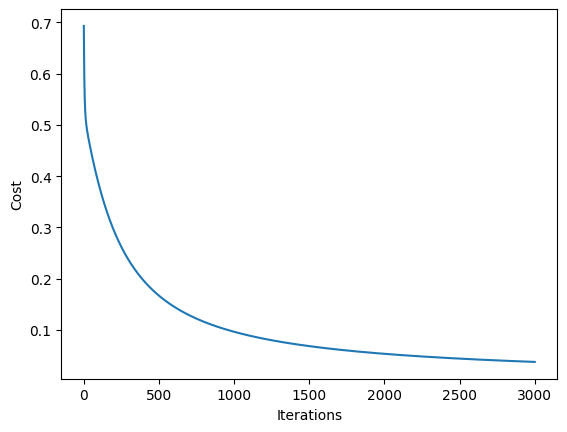

In [166]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)


In [167]:
predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

In [168]:
conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


30 120
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00125    0.00670833 0.00280417] 	
iteration: 101 	 cost: 0.654540915815861 	 weights: [ 0.03075294  0.11986749 -0.07892157] 	
iteration: 201 	 cost: 0.643825296284788 	 weights: [ 0.04766954  0.1758997  -0.16372617] 	
iteration: 301 	 cost: 0.6373269439240178 	 weights: [ 0.06031842  0.21985531 -0.2296812 ] 	
iteration: 401 	 cost: 0.6333164012914327 	 weights: [ 0.06973465  0.25463246 -0.28144578] 	
iteration: 501 	 cost: 0.6308014624702923 	 weights: [ 0.07667732  0.28236438 -0.32240993] 	
iteration: 601 	 cost: 0.6292022512295242 	 weights: [ 0.08170757  0.30463367 -0.35506021] 	
iteration: 701 	 cost: 0.6281729999914709 	 weights: [ 0.08524499  0.32262778 -0.38124317] 	
iteration: 801 	 cost: 0.6275035618523189 	 weights: [ 0.08760732  0.33724846 -0.40234853] 	
iteration: 901 	 cost: 0.6270640120263814 	 weights: [ 0.08903803  0.34918847 -0.41943574] 	
iteration: 1001 	 cost: 0.6267728210987314 	 weights: [ 0.08972573  0.

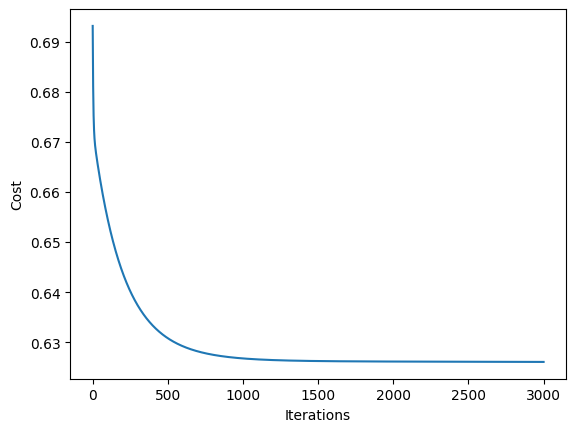

[ 0.0542391   0.41069296 -0.49729092]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[ 0.  5.]
 [ 7. 18.]]
accuracy = 60.00%


In [179]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Versicolor is assigned 0, others -> 1
y = np.where(labels == 1, 0, 1)

counter = 0

X_test = []
y_test = []
X_training = []
y_training = []

for row in range(data_size):
  if random.randint(0,3) == 1 and counter != test_limit:
    X_test.append(X[row])
    y_test.append(y[row])
    counter += 1
  else:
    X_training.append(X[row])
    y_training.append(y[row])

print(len(X_test), len(X_training))

X_training = np.array(X_training)
y_training = np.array(y_training)
X_test = np.array(X_test)
y_test = np.array(y_test)

alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

30 120
iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 0.00133333  0.00521667 -0.001075  ] 	
iteration: 101 	 cost: 0.5682764737446658 	 weights: [ 0.0773193   0.21082115 -0.26702457] 	
iteration: 201 	 cost: 0.4983640696553799 	 weights: [ 0.13495385  0.35412583 -0.48020325] 	
iteration: 301 	 cost: 0.45390415276354223 	 weights: [ 0.18260481  0.46956807 -0.64923413] 	
iteration: 401 	 cost: 0.42333036084002 	 weights: [ 0.223465    0.56604428 -0.78868326] 	
iteration: 501 	 cost: 0.40092227255026625 	 weights: [ 0.25952603  0.64908809 -0.90753873] 	
iteration: 601 	 cost: 0.38365838998005025 	 weights: [ 0.29206291  0.72224359 -1.01147132] 	
iteration: 701 	 cost: 0.36982972023336574 	 weights: [ 0.32192222  0.78786752 -1.10419255] 	
iteration: 801 	 cost: 0.35840842106185433 	 weights: [ 0.34968679  0.84758537 -1.18822485] 	
iteration: 901 	 cost: 0.3487428516145096 	 weights: [ 0.37577131  0.9025558  -1.26534275] 	
iteration: 1001 	 cost: 0.3404009787740696 	 weights: [ 0.4004

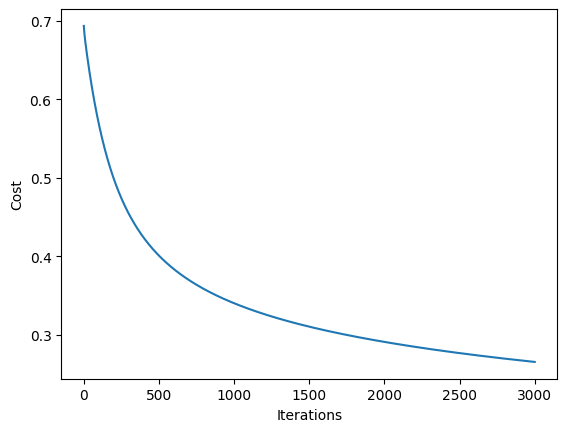

[ 0.76921738  1.61728654 -2.26353027]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
Confusion matrix result: 
[[ 6.  0.]
 [ 1. 23.]]
accuracy = 96.67%


In [176]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Versicolor is assigned 0, others -> 1
y = np.where(labels == 2, 0, 1)

counter = 0

X_test = []
y_test = []
X_training = []
y_training = []

for row in range(data_size):
  if random.randint(0,3) == 1 and counter != test_limit:
    X_test.append(X[row])
    y_test.append(y[row])
    counter += 1
  else:
    X_training.append(X[row])
    y_training.append(y[row])

print(len(X_test), len(X_training))

X_training = np.array(X_training)
y_training = np.array(y_training)
X_test = np.array(X_test)
y_test = np.array(y_test)

alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


30 120
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.002      0.014475   0.01519583] 	
iteration: 101 	 cost: 0.3796520468632481 	 weights: [-0.04449163 -0.05459839  0.41791408] 	
iteration: 201 	 cost: 0.2892112109786142 	 weights: [-0.09726127 -0.20509132  0.67150943] 	
iteration: 301 	 cost: 0.2306584559327847 	 weights: [-0.13913949 -0.32281174  0.87780092] 	
iteration: 401 	 cost: 0.19086062497734618 	 weights: [-0.17334178 -0.41793341  1.0491638 ] 	
iteration: 501 	 cost: 0.16248165036278076 	 weights: [-0.2020259  -0.49707801  1.19465112] 	
iteration: 601 	 cost: 0.14139156997517516 	 weights: [-0.22662167 -0.5645362   1.32057452] 	
iteration: 701 	 cost: 0.12517221140384233 	 weights: [-0.24809676 -0.62316376  1.43134613] 	
iteration: 801 	 cost: 0.11234203311360628 	 weights: [-0.26712569 -0.67492551  1.53011033] 	
iteration: 901 	 cost: 0.10195340688635594 	 weights: [-0.2841927  -0.72121748  1.61916139] 	
iteration: 1001 	 cost: 0.09337642601048962 	 weights: [-0.299

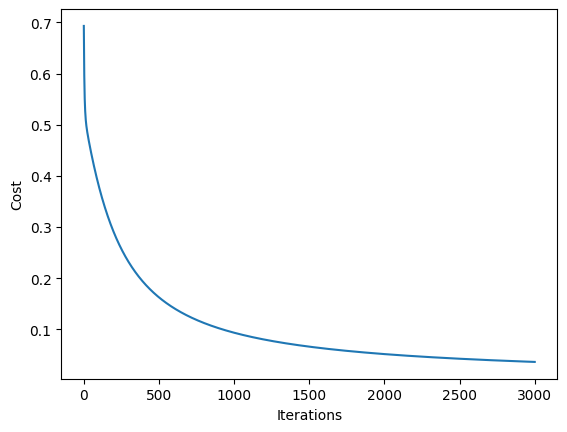

[-0.46773352 -1.21487075  2.60339781]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


In [180]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Versicolor is assigned 0, others -> 1
y = np.where(labels == 0, 0, 1)

counter = 0

X_test = []
y_test = []
X_training = []
y_training = []

for row in range(data_size):
  if random.randint(0,3) == 1 and counter != test_limit:
    X_test.append(X[row])
    y_test.append(y[row])
    counter += 1
  else:
    X_training.append(X[row])
    y_training.append(y[row])

print(len(X_test), len(X_training))

X_training = np.array(X_training)
y_training = np.array(y_training)
X_test = np.array(X_test)
y_test = np.array(y_test)

alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.0002     0.0014475  0.00151958] 	
iteration: 101 	 cost: 0.5234425887109924 	 weights: [0.00812923 0.07258062 0.10084385] 	
iteration: 201 	 cost: 0.49171281903569763 	 weights: [0.00577246 0.08104672 0.15522243] 	
iteration: 301 	 cost: 0.47360250342414695 	 weights: [0.00048534 0.07146691 0.19614174] 	
iteration: 401 	 cost: 0.4579845158074375 	 weights: [-0.00576426  0.05565728  0.23177557] 	
iteration: 501 	 cost: 0.44334204730325394 	 weights: [-0.01229647  0.03767888  0.26490245] 	
iteration: 601 	 cost: 0.4294102559926988 	 weights: [-0.01884787  0.0191048   0.29659868] 	
iteration: 701 	 cost: 0.4161213954690099 	 weights: [-0.02531216  0.00057405  0.32730984] 	
iteration: 801 	 cost: 0.40344122874244037 	 weights: [-0.0316468  -0.01765181  0.35722979] 	
iteration: 901 	 cost: 0.3913414787515022 	 weights: [-0.03783608 -0.0354693   0.38644835] 	
iteration: 1001 	 cost: 0.3797951819187999 	 weights: [-0.04387581 -0.05284242  

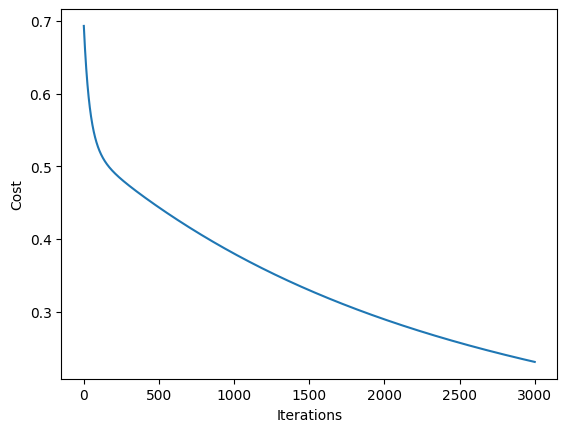

[-0.13863767 -0.32142107  0.87532841]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


In [181]:
alpha = 0.001
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.003      0.0217125  0.02279375] 	
iteration: 101 	 cost: 0.32922017966154216 	 weights: [-0.0728044  -0.13564352  0.55303227] 	
iteration: 201 	 cost: 0.2305732466506888 	 weights: [-0.13939756 -0.32352598  0.87907105] 	
iteration: 301 	 cost: 0.17548594691147024 	 weights: [-0.18848649 -0.4597807   1.12577481] 	
iteration: 401 	 cost: 0.1413368484303864 	 weights: [-0.22680698 -0.56503629  1.32151418] 	
iteration: 501 	 cost: 0.11835814164100332 	 weights: [-0.25804595 -0.65024086  1.48290152] 	
iteration: 601 	 cost: 0.10191751872891265 	 weights: [-0.28433816 -0.72160454  1.6199091 ] 	
iteration: 701 	 cost: 0.089596580467168 	 weights: [-0.30700318 -0.78290991  1.73883977] 	
iteration: 801 	 cost: 0.08002639898150848 	 weights: [-0.32690462 -0.83660513  1.84388152] 	
iteration: 901 	 cost: 0.0723794862306017 	 weights: [-0.34463508 -0.88435538  1.93794002] 	
iteration: 1001 	 cost: 0.06612821247298194 	 weights: [-0.36061731 -0.

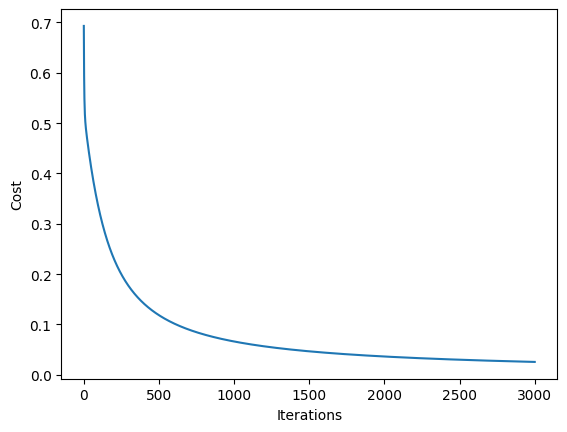

[-0.53167579 -1.38689972  2.9581239 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


In [182]:
alpha = 0.015
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.0018     0.0130275  0.01367625] 	
iteration: 101 	 cost: 0.39121930931543797 	 weights: [-0.03839015 -0.03704773  0.38906396] 	
iteration: 201 	 cost: 0.30420748039984963 	 weights: [-0.08764204 -0.17784329  0.62473254] 	
iteration: 301 	 cost: 0.24581575903016695 	 weights: [-0.12745143 -0.29010239  0.81981658] 	
iteration: 401 	 cost: 0.20510848843088764 	 weights: [-0.1603762  -0.38197676  0.98392207] 	
iteration: 501 	 cost: 0.17556869031073585 	 weights: [-0.18822772 -0.45907499  1.12447764] 	
iteration: 601 	 cost: 0.15334599386528797 	 weights: [-0.21225322 -0.52517241  1.24688821] 	
iteration: 701 	 cost: 0.13610569980087425 	 weights: [-0.23332058 -0.58285146  1.35505067] 	
iteration: 801 	 cost: 0.12238045638004262 	 weights: [-0.25204715 -0.63392458  1.45180572] 	
iteration: 901 	 cost: 0.1112137553100227 	 weights: [-0.2688829  -0.67969859  1.53926124] 	
iteration: 1001 	 cost: 0.101960579507048 	 weights: [-0.28416362 -

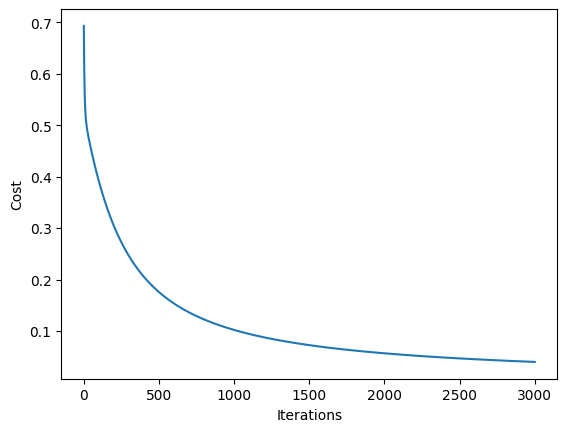

[-0.45123139 -1.17057201  2.51289996]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


In [183]:
alpha = 0.009
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.02       0.14475    0.15195833] 	
iteration: 101 	 cost: 0.09278741943720217 	 weights: [-0.30217965 -0.76962069  1.71299103] 	
iteration: 201 	 cost: 0.051376505359166144 	 weights: [-0.40624296 -1.04959065  2.26773061] 	
iteration: 301 	 cost: 0.03618899975019737 	 weights: [-0.46897996 -1.21794137  2.60971945] 	
iteration: 401 	 cost: 0.02822314984198248 	 weights: [-0.5140302  -1.33907023  2.85903402] 	
iteration: 501 	 cost: 0.023281974723397325 	 weights: [-0.54921734 -1.4339812   3.05609162] 	
iteration: 601 	 cost: 0.019900919362165648 	 weights: [-0.57810308 -1.51217007  3.21947545] 	
iteration: 701 	 cost: 0.017433027186389158 	 weights: [-0.60261112 -1.57874581  3.35929633] 	
iteration: 801 	 cost: 0.015547281885851376 	 weights: [-0.62389929 -1.63677661  3.48167661] 	
iteration: 901 	 cost: 0.014056288213832698 	 weights: [-0.64271899 -1.68825105  3.5906101 ] 	
iteration: 1001 	 cost: 0.012845786798874175 	 weights: [-0.

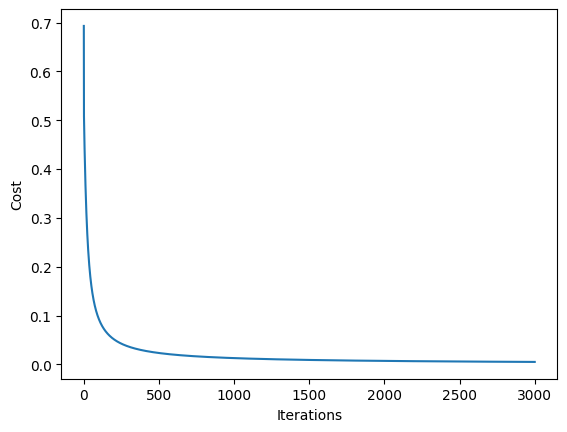

[-0.83702994 -2.23200671  4.76062269]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


In [184]:
alpha = 0.1
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.004      0.02895    0.03039167] 	
iteration: 101 	 cost: 0.2890275614845544 	 weights: [-0.09785347 -0.20675268  0.67436827] 	
iteration: 201 	 cost: 0.19071164996427076 	 weights: [-0.17379831 -0.41918344  1.05144017] 	
iteration: 301 	 cost: 0.14128203271112696 	 weights: [-0.22699244 -0.56553646  1.32245413] 	
iteration: 401 	 cost: 0.11226002379327449 	 weights: [-0.26743889 -0.67576192  1.53171389] 	
iteration: 501 	 cost: 0.09331302271128333 	 weights: [-0.29992713 -0.76378196  1.70161525] 	
iteration: 601 	 cost: 0.08000113684020844 	 weights: [-0.32702535 -0.8369231   1.84450649] 	
iteration: 701 	 cost: 0.07014019784379324 	 weights: [-0.35024825 -0.8994502   1.96779595] 	
iteration: 801 	 cost: 0.06254028725487565 	 weights: [-0.37055728 -0.9540441   2.0762415 ] 	
iteration: 901 	 cost: 0.05650059059504002 	 weights: [-0.38859846 -1.00249239  2.17306778] 	
iteration: 1001 	 cost: 0.05158241580209855 	 weights: [-0.40482577

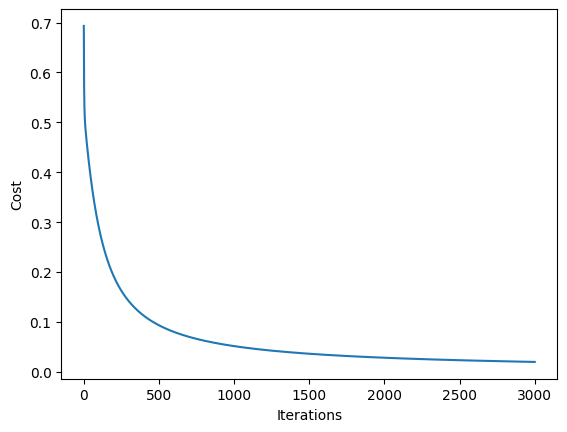

[-0.57739192 -1.51051136  3.21596377]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


In [185]:
alpha = 0.02
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.1        0.72375    0.75979167] 	
iteration: 101 	 cost: 0.022718803784900394 	 weights: [-0.55852909 -1.44866092  3.08811584] 	
iteration: 201 	 cost: 0.01267630218155073 	 weights: [-0.66628867 -1.7423196   3.7068694 ] 	
iteration: 301 	 cost: 0.009009678555300153 	 weights: [-0.73051052 -1.92011896  4.08693423] 	
iteration: 401 	 cost: 0.007072538467040862 	 weights: [-0.77649143 -2.04901485  4.36474436] 	
iteration: 501 	 cost: 0.005862283208441391 	 weights: [-0.81237019 -2.15061784  4.58497914] 	
iteration: 601 	 cost: 0.005029014077490706 	 weights: [-0.84181812 -2.23472209  4.76806469] 	
iteration: 701 	 cost: 0.004417588159617066 	 weights: [-0.86680877 -2.30661831  4.92510464] 	
iteration: 801 	 cost: 0.00394828117164816 	 weights: [-0.88852636 -2.36949638  5.06282687] 	
iteration: 901 	 cost: 0.0035757677494543606 	 weights: [-0.90773768 -2.4254312   5.18562549] 	
iteration: 1001 	 cost: 0.0032723022290074306 	 weights: [

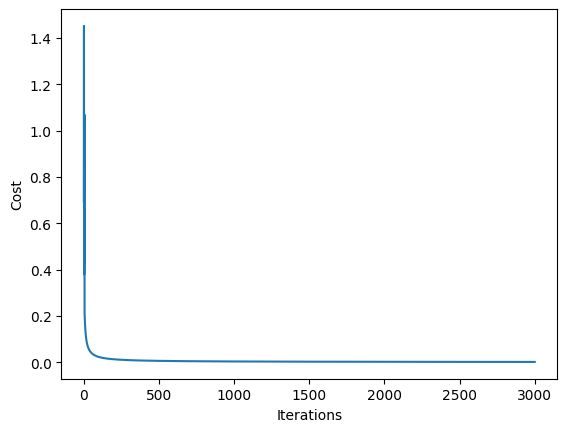

[-1.10754435 -3.02464819  6.51478554]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[14.  0.]
 [ 0. 16.]]
accuracy = 100.00%


In [186]:
alpha = 0.5
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [2.00000000e-07 1.44750000e-06 1.51958333e-06] 	
iteration: 101 	 cost: 0.6927033132671473 	 weights: [2.01814643e-05 1.46084387e-04 1.53397078e-04] 	
iteration: 201 	 cost: 0.6922605930352187 	 weights: [4.01262576e-05 2.90497489e-04 3.05114641e-04] 	
iteration: 301 	 cost: 0.6918190167857208 	 weights: [6.00344294e-05 4.34687109e-04 4.56672484e-04] 	
iteration: 401 	 cost: 0.6913785814468992 	 weights: [7.99060294e-05 5.78653548e-04 6.08070823e-04] 	
iteration: 501 	 cost: 0.6909392839536822 	 weights: [9.97411071e-05 7.22397108e-04 7.59309870e-04] 	
iteration: 601 	 cost: 0.6905011212476819 	 weights: [0.00011954 0.00086592 0.00091039] 	
iteration: 701 	 cost: 0.6900640902771952 	 weights: [0.0001393  0.00100922 0.00106131] 	
iteration: 801 	 cost: 0.6896281879972038 	 weights: [0.00015903 0.00115229 0.00121207] 	
iteration: 901 	 cost: 0.6891934113693751 	 weights: [0.00017872 0.00129515 0.00136268] 	
iteration: 1001 	 cost: 0.6887

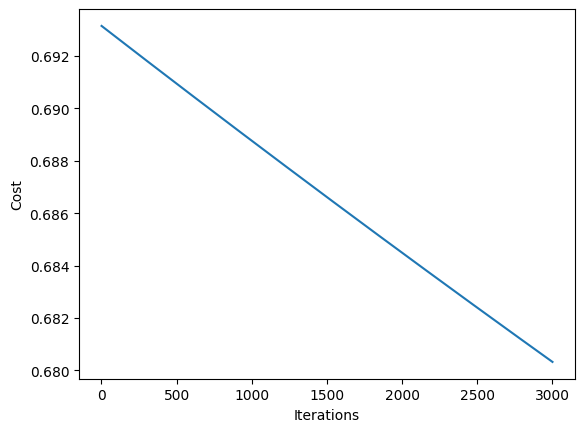

[0.0005837  0.00424305 0.00448767]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix result: 
[[ 0. 14.]
 [ 0. 16.]]
accuracy = 53.33%


In [190]:
alpha = 0.000001
num_iter = 3000
model_weights = fit(alpha, num_iter, X_training,y_training)

print(model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

print(pred)
print(true)

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))